In [6]:
import numpy as np
import os

# plotting
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from dream_utils import DREAM

In [2]:
data_path = os.path.join('stevenson', 'data', 'Stevenson_2011_e1.mat')
#data_path = os.path.join('flint', 'data', 'Flint_2012_e2.mat')
dream = DREAM(data_path=data_path)

In [3]:
b0_t, b1_t, thetap_t = dream.fit(
    subject_idx=0, 
    fit='gaussian_tuning', 
    form='gaussian', 
    transform='square_root',
    neuron_idx=None
)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [21]:
b0_tc, b1_tc, thetap_tc = dream.fit(
    subject_idx=0,
    fit='lasso_tuning_coupling',
    form='gaussian',
    transform='square_root',
    neuron_idx=np.arange(9)
)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [17]:
idx = 2
angles = dream.get_design_matrix(subject_idx=0, form='angle')
y = dream.get_response_matrix(subject_idx=0, transform='square_root')
r2_score(y[:, idx], b0_t[idx] + b1_t[idx] * np.cos(np.deg2rad(angles - thetap_tc[idx])))

0.6488652550235474

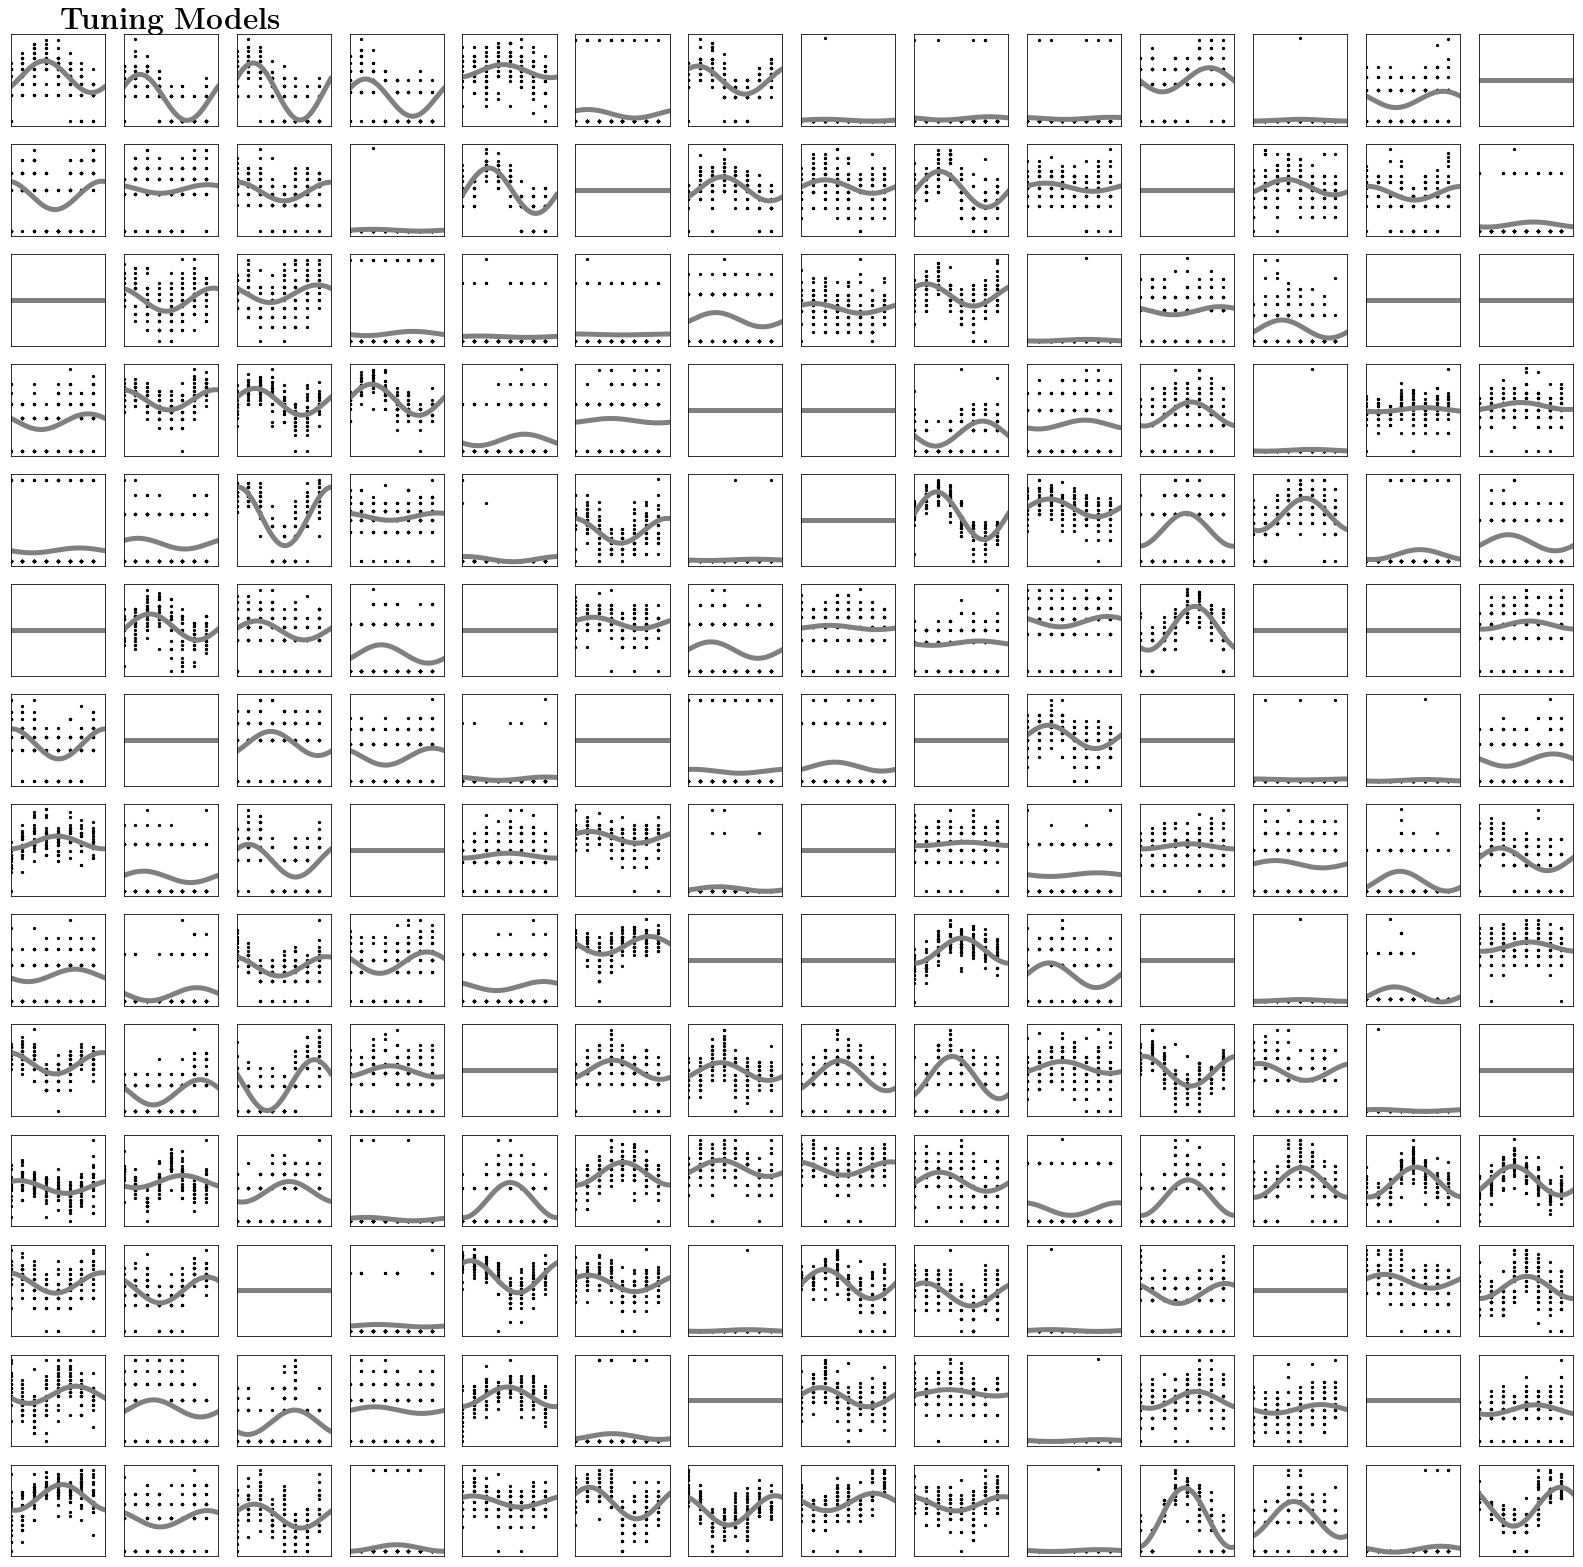

In [30]:
fig, axes = plt.subplots(14, 14, figsize=(28,28))
axes_list = axes.ravel()
thetas = np.linspace(0, 360, 1000)
angles = dream.get_design_matrix(subject_idx=0, form='angle')
y = dream.get_response_matrix(subject_idx=0, transform='square_root')
for idx, ax in enumerate(axes_list):
    for angle_idx, angle in enumerate(angles):
        ax.scatter(angle, y[angle_idx, idx], color='k', s=5)
    ax.plot(thetas, b0_t[idx] + b1_t[idx] * np.cos(np.deg2rad(thetas - thetap_t[idx])), color='gray', linewidth=5)
    #ax.plot(thetas, b0_tc[idx] + b1_tc[idx] * np.cos(np.deg2rad(thetas - thetap_tc[idx])), color='blue', linewidth=5)
    ax.set_xlim([0, 360])
    ax.set_xticks([])
    ax.set_yticks([])
axes[0,1].set_title(r'\textbf{Tuning Models}', fontsize=30)
plt.savefig('t.pdf')

In [21]:
def plot_tuning_curve(idx, c1, c2, ax=None, color='b'):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    thetas = np.linspace(0, 360, 1000)
    ax.plot(thetas, c1 * np.cos(np.pi/180 * thetas) + c2 * np.sin(np.pi/180 * thetas), color=color, linewidth=5)

# Tuning Modulation and Tuning Preference

In [49]:
def equalize(ax):
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))

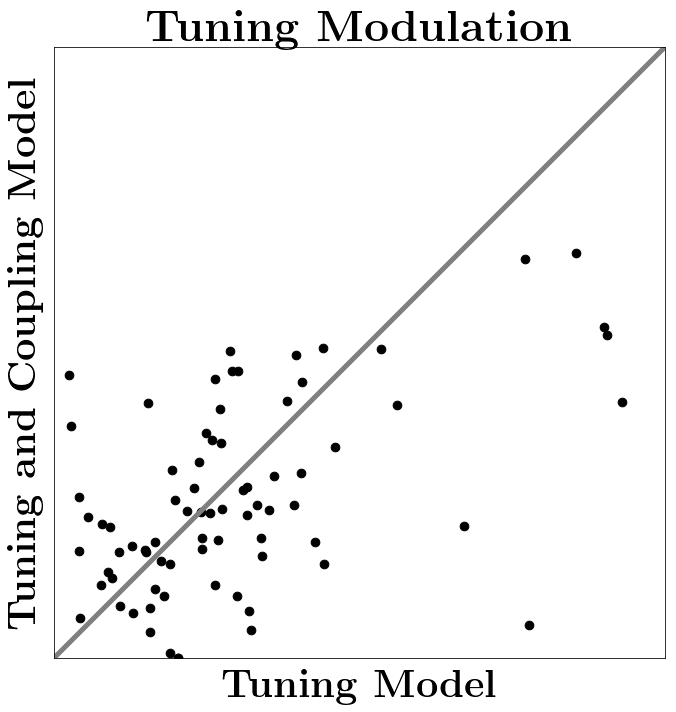

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

thetas = np.linspace(0, 360, 5000)
modulation_t = np.zeros((responses.shape[1]))
modulation_tc = np.zeros((responses.shape[1]))
preferred_t = np.zeros((responses.shape[1]))
preferred_t_alt = np.zeros((responses.shape[1]))
preferred_tc = np.zeros((responses.shape[1]))
preferred_tc_alt = np.zeros((responses.shape[1]))

for neuron in range(responses.shape[1]):
    responses_t = c1[neuron] * np.cos(np.pi/180 * thetas) + c2[neuron] * np.sin(np.pi/180 * thetas)
    responses_tc = c1_tc[neuron] * np.cos(np.pi/180 * thetas) + c2_tc[neuron] * np.sin(np.pi/180 * thetas)
    modulation_t[neuron] = np.max(responses_t) - np.min(responses_t)
    modulation_tc[neuron] = np.max(responses_tc) - np.min(responses_tc)
    preferred_t[neuron] = thetas[np.argmax(responses_t)]
    preferred_t_alt[neuron] = np.arctan2(c2[neuron], c1[neuron]) * (180/np.pi)
    preferred_tc[neuron] = thetas[np.argmax(responses_tc)]
    preferred_tc_alt[neuron] = np.arctan2(c2_tc[neuron], c1_tc[neuron]) * (180/np.pi)

axes.scatter(modulation_t, modulation_tc, color='k', s=75)
axes.set_xticks([])
axes.set_yticks([])
axes.set_xlim([0, 0.5])
axes.set_ylim([0.,0.5])
axes.plot(axes.get_xlim(), axes.get_ylim(), color='gray', linewidth=5)
axes.set_xlabel(r'\textbf{Tuning Model}', fontsize=40, labelpad=10)
axes.set_ylabel(r'\textbf{Tuning and Coupling Model}', fontsize=40, labelpad=10)
axes.set_title(r'\textbf{Tuning Modulation}', fontsize=45)
equalize(axes)
plt.tight_layout()
plt.savefig('fig1a-2.pdf')

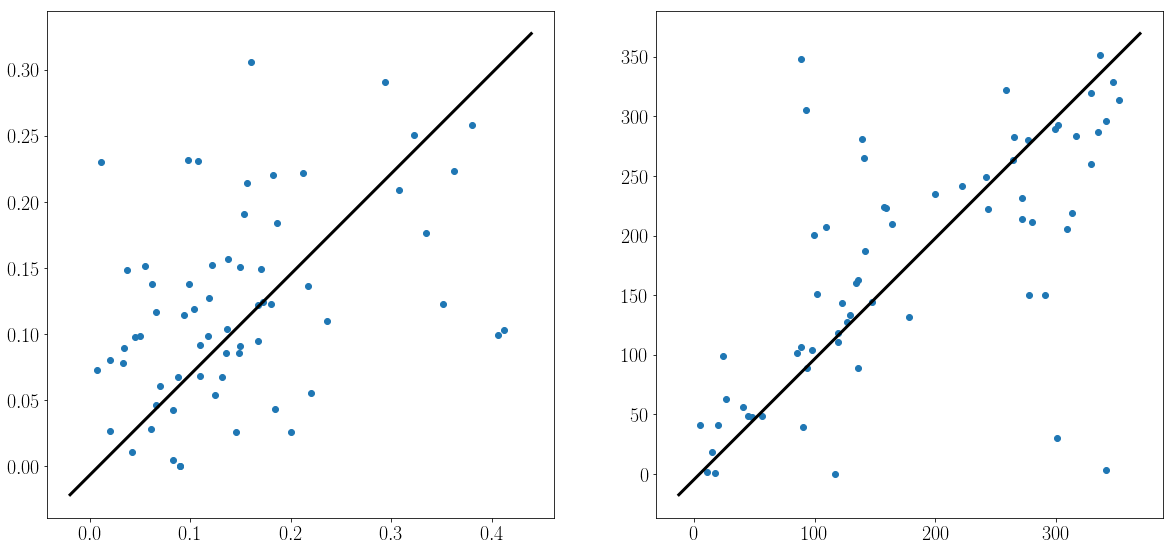

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

thetas = np.linspace(0, 360, 5000)
modulation_t = np.zeros((responses.shape[1]))
modulation_tc = np.zeros((responses.shape[1]))
preferred_t = np.zeros((responses.shape[1]))
preferred_t_alt = np.zeros((responses.shape[1]))
preferred_tc = np.zeros((responses.shape[1]))
preferred_tc_alt = np.zeros((responses.shape[1]))

for neuron in range(responses.shape[1]):
    responses_t = c1[neuron] * np.cos(np.pi/180 * thetas) + c2[neuron] * np.sin(np.pi/180 * thetas)
    responses_tc = c1_tc[neuron] * np.cos(np.pi/180 * thetas) + c2_tc[neuron] * np.sin(np.pi/180 * thetas)
    modulation_t[neuron] = np.max(responses_t) - np.min(responses_t)
    modulation_tc[neuron] = np.max(responses_tc) - np.min(responses_tc)
    preferred_t[neuron] = thetas[np.argmax(responses_t)]
    preferred_t_alt[neuron] = np.arctan2(c2[neuron], c1[neuron]) * (180/np.pi)
    preferred_tc[neuron] = thetas[np.argmax(responses_tc)]
    preferred_tc_alt[neuron] = np.arctan2(c2_tc[neuron], c1_tc[neuron]) * (180/np.pi)

axes[0].scatter(modulation_t, modulation_tc)
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), color='k', linewidth=3)
equalize(axes[0])

axes[1].scatter(preferred_t, preferred_tc)
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), color='k', linewidth=3)
equalize(axes[1])

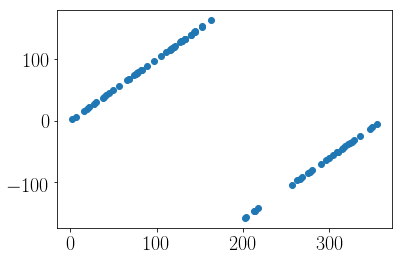

In [76]:
plt.scatter(preferred_t, preferred_t_alt)

# PyGLMnet

In [42]:
from sklearn.preprocessing import StandardScaler
from pyglmnet import GLM

In [43]:
subject = get_subject(data, 1)
stimuli, responses = get_all_responses(subject)
design = angles_to_design(stimuli)

In [44]:
def tuning_model_GLM(design, responses):
    n_neurons = responses.shape[1]
    b0 = np.zeros(n_neurons)
    c1 = np.zeros(n_neurons)
    c2 = np.zeros(n_neurons)
    for neuron in range(n_neurons):
        #scaler = StandardScaler()
        #design = scaler.fit(design)
        glm = GLM(distr='poisson', alpha=0.)
        glm.fit(design, responses[:, neuron])
        # extract fit
        fit = glm.fit_[0]
        # extract model
        b0[neuron] = fit['beta0']
        c1[neuron] = fit['beta'][0]
        c2[neuron] = fit['beta'][1]
    # transform to tuning curve model
    theta_star = np.arctan2(c2, c1) * (180/np.pi)
    theta_star[theta_star < 0] += 360
    b1 = (c2 - c1)/(np.sin(theta_star) - np.cos(theta_star))
    # get responsive cells
    responsive_indices = np.argwhere(b0 != 0).ravel()
    return b0, b1, theta_star, responsive_indices

In [45]:
def tuning_coupling_model_GLM(design, responses):
    n_neurons = responses.shape[1]
    b0 = np.zeros(n_neurons)
    c1 = np.zeros(n_neurons)
    c2 = np.zeros(n_neurons)
    for neuron in range(n_neurons):
        X = np.concatenate((design, np.delete(responses, neuron, axis=1)), axis=1)
        y = responses[:, neuron]
        glm = GLM(distr='poisson', alpha=0.)
        glm.fit(design, responses[:, neuron])
        fit = glm.fit_[0]
        # store fits
        b0[neuron] = fit['beta0']
        c1[neuron] = fit['beta'][0]
        c2[neuron] = fit['beta'][1]
    # get responsive cells
    responsive_indices = np.argwhere(b0 != 0).ravel()
    # transform to tuning curve model
    theta_star = np.arctan2(c2, c1) * (180/np.pi)
    theta_star[theta_star < 0] += 360
    b1 = (c2 - c1)/(np.sin(theta_star) - np.cos(theta_star))
    return b0, b1, theta_star, responsive_indices

In [46]:
b0, b1, theta_star, responsive_indices = tuning_model_GLM(design, responses)
b0_tc, b1_tc, theta_star_tc, responsive_indices_tc = tuning_coupling_model_GLM(design, responses)

In [39]:
def plot_tuning_curve(idx, b0, b1, theta_star, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    thetas = np.linspace(0, 360, 1000)
    ax.plot(thetas, b1[idx] * np.cos((np.pi/180) * (thetas - theta_star[idx])))

NameError: name 'store_responsive_indices' is not defined

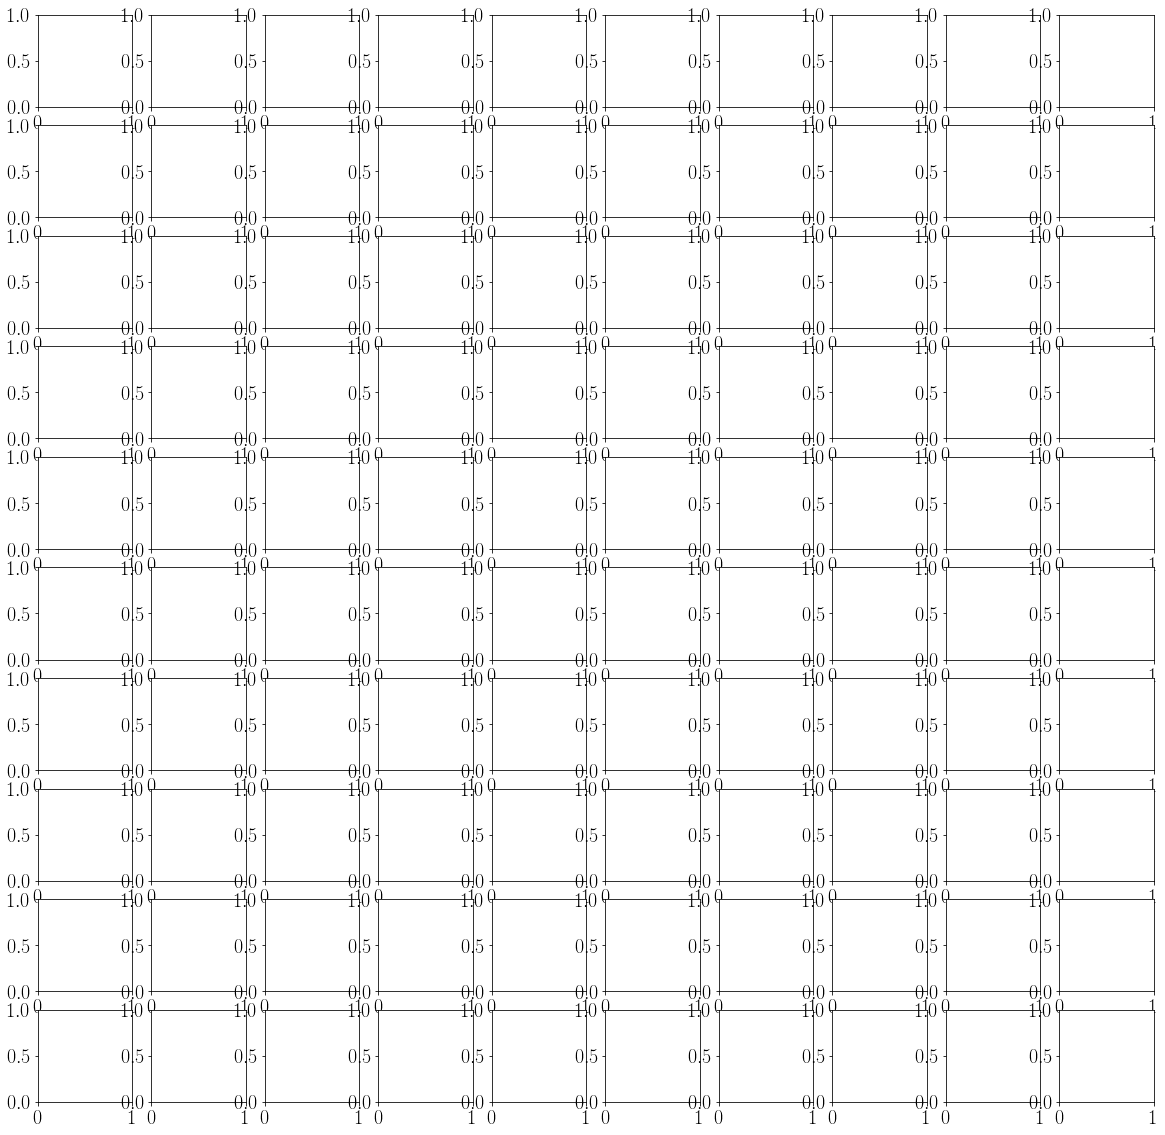

In [40]:
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
axes_list = axes.ravel()

# plot tuning model
for idx, neuron_idx in enumerate(store_responsive_indices):
    ax = axes_list[idx]
    plot_tuning_curve(neuron_idx, b0, b1, theta_star, ax=ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# plot tuning+coupling model
for idx, neuron_idx in enumerate(store_responsive_indices):
    ax = axes_list[idx]
    plot_tuning_curve(neuron_idx, b0_tc, b1_tc, theta_star_tc, ax=ax)

axes[-1, -1].axis('off')
axes[-1, -2].axis('off')
axes[-1, -3].axis('off')
axes[-1, -4].axis('off')
axes[-1, -5].axis('off')
fig.suptitle(r'\textbf{GLM}' '\n' r'\textbf{Blue: Tuning Model; Orange: Tuning + Coupling Model}', fontsize=30)
plt.tight_layout(rect=[0, 0.0, 1, 0.94])
plt.savefig('dream_glm.pdf')

In [26]:
responsive_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [27]:
np.sqrt(180)

13.416407864998739

In [155]:
thetastar[0]

74.68106432760655

In [168]:
thetas = np.linspace(0, 360, 1000) * np.pi/180
ruff = np.zeros((thetas.size, 2))
ruff[:, 0] = np.cos(thetas)
ruff[:, 1] = np.sin(thetas)
pew = glm.predict(ruff)

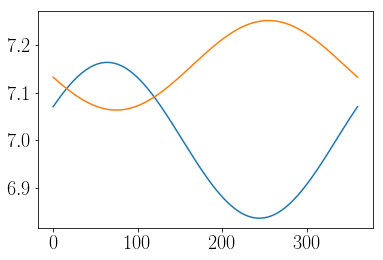

In [169]:
plt.plot(thetas * 180/np.pi, pew[0])
plot_tuning_curve(0)